In [1]:
import pandas as pd
import numpy as np

In [5]:
col_1 = np.array([10,20,30,40,50,60,70,80,90])
col_2 =np.array( [15,25,35,45,55,65,75,85,95])

In [6]:
out = []
for i in range(len(col_1)):
  out.append(col_1[i] + col_2[i])
out_col = np.array(out)
out_col

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [8]:
out_col - np.array([col_1[i] + col_2[i] for i in range(len(col_1))])
out_col

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [30]:
col_1 = col_1.reshape(len(col_1),1)
col_2 = col_2.reshape(len(col_2),1)
out_col = out_col.reshape(len(out_col),1)
data = np.hstack((col_1,col_2,out_col))
print(data)
print(data.shape)


[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]
(9, 3)


In [27]:
def feature_selection(n_steps,data):
  x = []
  y =[]
  for i in range(n_steps,len(data)+1):
    x.append(data[i-n_steps:i,:2])
    y.append(data[i-1,-1])
  return np.array(x),np.array(y)

In [28]:
n_steps = 3
x,y = feature_selection(n_steps,data)
x,y

(array([[[10, 15],
         [20, 25],
         [30, 35]],
 
        [[20, 25],
         [30, 35],
         [40, 45]],
 
        [[30, 35],
         [40, 45],
         [50, 55]],
 
        [[40, 45],
         [50, 55],
         [60, 65]],
 
        [[50, 55],
         [60, 65],
         [70, 75]],
 
        [[60, 65],
         [70, 75],
         [80, 85]],
 
        [[70, 75],
         [80, 85],
         [90, 95]]]), array([ 65,  85, 105, 125, 145, 165, 185]))

In [21]:
from keras.layers import LSTM,Dense
from keras.models import Sequential
model = Sequential()
model.add(LSTM(50,activation = 'relu',input_shape = (n_steps,x.shape[2])))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 18456.0176
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 18290.5918
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 18133.1074
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 17981.4492
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 17833.5898
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 17687.7012
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 17542.3223
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 17396.4082
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 17248.7695
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 17098.1523
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 16943.0977
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 16781.6895
Epoch 13/100

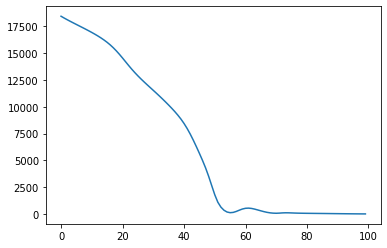

In [22]:
history = model.fit(x,y,epochs=100)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [23]:
xtest = np.array([[80,85],[90,95],[100,105]])
xtest = xtest.reshape(1,n_steps,2)
ypred = model.predict(xtest)
ypred

array([[207.26059]], dtype=float32)